In [68]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')

In [69]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [70]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [71]:
import matplotlib.pyplot as plt

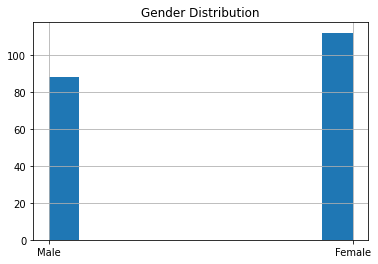

In [72]:
df['Genre'].hist()
plt.title('Gender Distribution')
plt.xticks([0,1], ('Male', 'Female'))
plt.show()

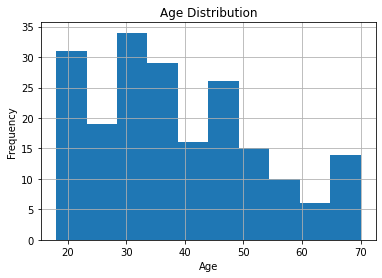

In [73]:
df['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

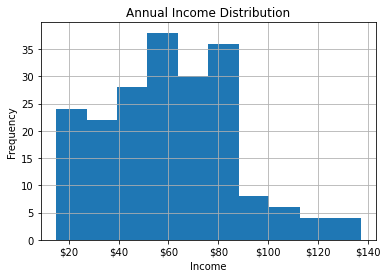

In [74]:
df['Annual Income (k$)'].hist()
plt.title('Annual Income Distribution')
plt.xlabel('Income')
plt.xticks([20,40,60,80,100,120,140], ('$20', '$40', '$60', '$80', '$100', '$120','$140'))
plt.ylabel('Frequency')
plt.show()

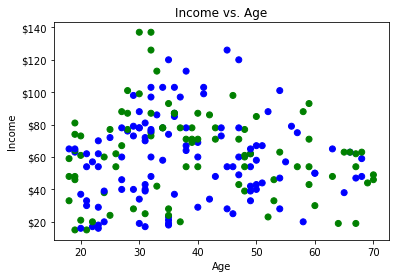

<Figure size 43200x57600 with 0 Axes>

In [75]:
color = {'Male': 'green', 'Female':'blue'}
plt.scatter(df['Age'], df['Annual Income (k$)'], c = df['Genre'].map(color))
plt.title("Income vs. Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.yticks([20,40,60,80,100,120,140], ('$20', '$40', '$60', '$80', '$100', '$120','$140'))
plt.figure(figsize = [600, 800])
plt.show()

In [76]:
df['Genre'] = df['Genre'].replace({'Male':0,'Female': 1})

In [77]:
df.loc[:, ['Age', 'Annual Income (k$)', 'Genre']].corr()

,Age,Annual Income (k$),Genre
Age,1.000000,-0.012398,-0.060867
Annual Income (k$),-0.012398,1.000000,-0.056410
Genre,-0.060867,-0.056410,1.000000


In [78]:
from sklearn.model_selection import train_test_split
X = df.loc[:, ['Age', 'Annual Income (k$)', 'Genre']]
Y = df.loc[:, ['Spending Score (1-100)']]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Multiple Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

print('Linear Regression MSE: ', mean_squared_error(y_test, y_pred))
print('Linear Regression R^2: ', r2_score(y_test, y_pred))

Linear Regression MSE:  640.4429168048791
Linear Regression R^2:  0.15451964144097086


# Clustering

In [81]:
data = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']]

In [82]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters = 2)
cluster.fit(data)

KMeans(n_clusters=2)

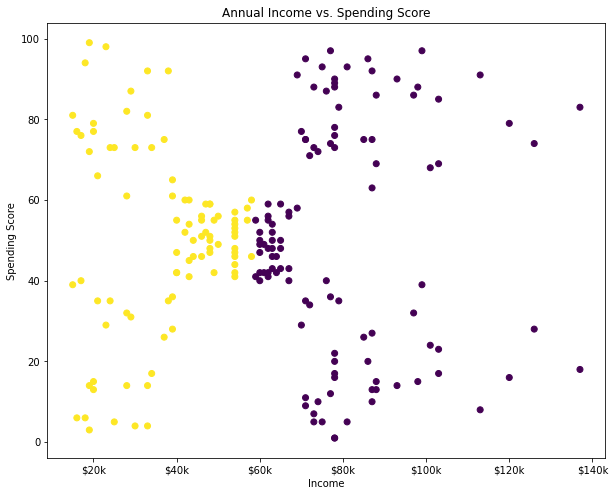

In [83]:
# Plot Scatter Plot
plt.figure(figsize=(10, 8))
plt.scatter(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'], c = cluster.labels_)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.xticks([20,40,60,80,100,120,140], ('$20k', '$40k', '$60k', '$80k', '$100k', '$120k','$140k'))
plt.show()

# Determine Optimal Number of Clusters

In [84]:
empty_scores = []
for i in range (1, 20):
    cluster = cluster = KMeans(n_clusters = i)
    cluster.fit(data)
    empty_scores.append(cluster.inertia_)

In [85]:
empty_scores

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30241.34361793659,
 25036.881008846223,
 21996.523372372296,
 19669.71099830122,
 17989.153533785062,
 16294.076249396603,
 14271.670282658524,
 13135.77153289654,
 11640.112000980025,
 10898.318492859793,
 9994.600655141954,
 9575.230549160982,
 8808.619286510584]

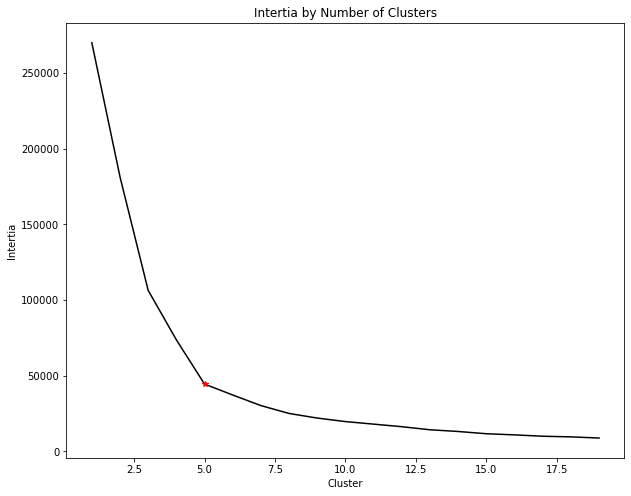

In [86]:
plt.figure(figsize=(10, 8))
plt.plot(range(1,20), empty_scores, color = 'black')
plt.plot(5, 44448.45544793369, marker = '*', color = 'red')
plt.title('Intertia by Number of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Intertia')
plt.show()

In [87]:
cluster = KMeans(n_clusters = 5)
cluster.fit(data)

KMeans(n_clusters=5)

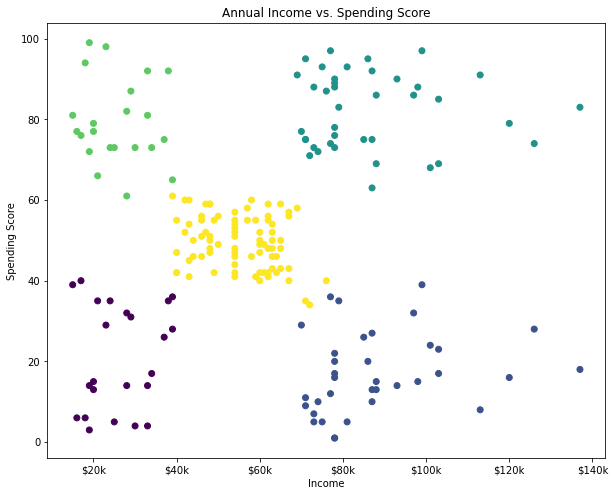

In [88]:
# Plot Scatter Plot
plt.figure(figsize=(10, 8))
plt.scatter(x = data['Annual Income (k$)'], y = data['Spending Score (1-100)'], c = cluster.labels_)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.xticks([20,40,60,80,100,120,140], ('$20k', '$40k', '$60k', '$80k', '$100k', '$120k','$140k'))
plt.show()